<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Import-some-libraries" data-toc-modified-id="Import-some-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import some libraries</a></span></li><li><span><a href="#Early-Warning-Signals" data-toc-modified-id="Early-Warning-Signals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Early Warning Signals</a></span><ul class="toc-item"><li><span><a href="#Metric-based" data-toc-modified-id="Metric-based-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Metric-based</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation" data-toc-modified-id="Standard-Deviation-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Standard Deviation</a></span><ul class="toc-item"><li><span><a href="#Skewness" data-toc-modified-id="Skewness-1.2.1.1.1"><span class="toc-item-num">1.2.1.1.1&nbsp;&nbsp;</span>Skewness</a></span></li></ul></li><li><span><a href="#Kurtosis" data-toc-modified-id="Kurtosis-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Kurtosis</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Early Warning Signals

Detecting critical transitions in timeseries

Author: Alva Presbitero

## Import some libraries

In [14]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis
from itertools import product

In [2]:
noise_list = []
noise_type_list = ['sigmoid', 'gaussian']
sigma_type_list = ['constant', 'increasing']

output = list(product(noise_type_list, sigma_type_list))

for index, (noise_type, sigma_type) in enumerate(output):
    print ('noise_type :', index, noise_type, sigma_type)
    pickle_dir = f'result/pickle/noise/{noise_type}/{sigma_type}/'
    pickle_file = noise_type + '_' + sigma_type + '.pickle'
    with open(pickle_dir + pickle_file, 'rb') as f:
        noise_list.append(pickle.load(f))
#         print (noise_list[index])

noise_type : 0 sigmoid constant
noise_type : 1 sigmoid increasing
noise_type : 2 gaussian constant
noise_type : 3 gaussian increasing


In [3]:
noise_1, noise_2, noise_3, noise_4 = noise_list[0], noise_list[1], noise_list[2], noise_list[3]

## Early Warning Signals

<img src='images/EWS' width="400" height="400">


In [4]:
# used to detrend
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

In [5]:
noise_1.keys()

Index(['N_R', 'AP_Eblood', 'AP_Etissue', 'AP_Eliver', 'AP_Sblood',
       'AP_Stissue', 'ITMblood', 'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N', 'Time'],
      dtype='object')

### Metric-based
#### Standard Deviation

In [6]:
def do_ews_std(dataset):
    return dataset.rolling(int(len(diff)/2), center=True).std()

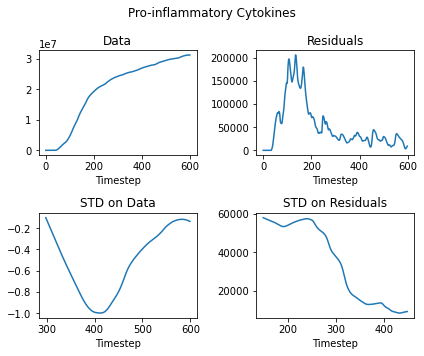

In [36]:
diff = pd.DataFrame(difference(noise_1.CH[0:600]))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
fig.suptitle('Pro-inflammatory Cytokines')

axes[0,0].plot(noise_1.CH[0:600])
axes[0,0].set_title("Data")
axes[0,0].set_xlabel("Timestep")

axes[0,1].plot(diff)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel("Timestep")

axes[1,0].plot(do_ews_skew(noise_1.CH[0:600]))
axes[1,0].set_title("STD on Data")
axes[1,0].set_xlabel("Timestep")

axes[1,1].plot(do_ews_std(diff))
axes[1,1].set_title("STD on Residuals")
axes[1,1].set_xlabel("Timestep")

fig.tight_layout()

##### Skewness


In [10]:
def do_ews_skew(dataset):
    return dataset.rolling(int(len(diff)/2)).apply(skew)

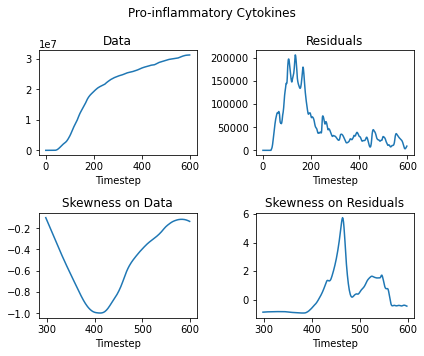

In [35]:
diff = pd.DataFrame(difference(noise_1.CH[0:600]))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
fig.suptitle('Pro-inflammatory Cytokines')

axes[0,0].plot(noise_1.CH[0:600])
axes[0,0].set_title("Data")
axes[0,0].set_xlabel("Timestep")

axes[0,1].plot(diff)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel("Timestep")

axes[1,0].plot(do_ews_skew(noise_1.CH[0:600]))
axes[1,0].set_title("Skewness on Data")
axes[1,0].set_xlabel("Timestep")

axes[1,1].plot(do_ews_kurt(diff))
axes[1,1].set_title("Skewness on Residuals")
axes[1,1].set_xlabel("Timestep")

fig.tight_layout()

#### Kurtosis

In [19]:
def do_ews_kurt(dataset):
    return dataset.rolling(int(len(dataset)/2)).apply(kurtosis)

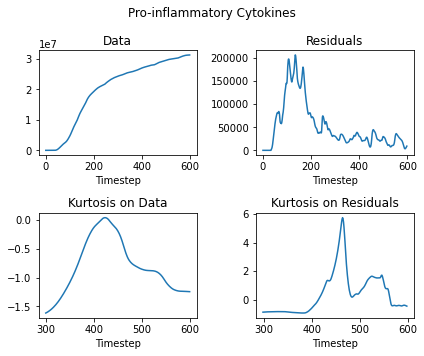

In [34]:
diff = pd.DataFrame(difference(noise_1.CH[0:600]))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 5))
fig.suptitle('Pro-inflammatory Cytokines')

axes[0,0].plot(noise_1.CH[0:600])
axes[0,0].set_title("Data")
axes[0,0].set_xlabel("Timestep")

axes[0,1].plot(diff)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel("Timestep")

axes[1,0].plot(do_ews_kurt(noise_1.CH[0:600]))
axes[1,0].set_title("Kurtosis on Data")
axes[1,0].set_xlabel("Timestep")

axes[1,1].plot(do_ews_kurt(diff))
axes[1,1].set_title("Kurtosis on Residuals")
axes[1,1].set_xlabel("Timestep")

fig.tight_layout()